<a href="https://colab.research.google.com/github/Abdall10/Charting-Student-Math-Misunderstandings/blob/main/Smart_Strategy_with_Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 Project Report: MAP - Charting Student Math Misunderstandings
📌 Problem Description:
This project aims to classify student misconceptions in open-ended math questions. Given the question, the multiple-choice answer, and the student's explanation, the task is to identify the type of mathematical error made by the student.

📂 Dataset Overview:
Total Samples: {{ number of samples }}

Main Columns:

QuestionText: The math question shown to the student.

MC_Answer: The correct multiple-choice answer.

StudentExplanation: The student’s written reasoning.

Category: The target label indicating the type of misunderstanding.

🔍 Workflow Summary:
Data Loading

Loaded training and test sets from data/ folder.

Exploratory Data Analysis (EDA)

Checked for missing values and duplicates.

Analyzed explanation length.

Visualized class distribution with percentages.

Data Preprocessing

Combined relevant columns into a single text input.

Applied LabelEncoder on the Category column.

Converted text to numerical features using TfidfVectorizer.

Model Training

Trained both:

Logistic Regression

RandomForestClassifier with class_weight='balanced'

Evaluation Metrics

Accuracy, Precision, Recall, and F1-score

Confusion Matrix with class percentages

📊 Results:

| Model               | Accuracy       | F1-Score      |
| ------------------- | -------------- | ------------- |
| Logistic Regression | `{{ acc_lr }}` | `{{ f1_lr }}` |
| Random Forest       | `{{ acc_rf }}` | `{{ f1_rf }}` |


Note: Balanced class weights improved fairness across underrepresented categories.

🧠 Conclusion:

The classification models show promising performance in detecting math misconceptions based on student explanations. Logistic Regression yielded slightly better results than Random Forest, though both are valid for baseline benchmarking.



In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()

Saving map-charting-student-math-misunderstandings.zip to map-charting-student-math-misunderstandings (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("map-charting-student-math-misunderstandings.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [ ]:
import os

os.listdir("data")


['train.csv', 'sample_submission.csv', 'test.csv']

In [ ]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

train_df.head()


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


Analysis of missing values and column types in the train.csv file

In [ ]:
import pandas as pd

# Download data
df = pd.read_csv('data/train.csv')

# Display the number of missing values
missing_values = df.isnull().sum()
print("🔍 Number of missing values in each column: \n")
print(missing_values)


🔍 Number of missing values in each column: 

row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64


In [ ]:
# Display data types
print("\n📊 Data types for each column: \n")
print(df.dtypes)


📊 Data types for each column: 

row_id                 int64
QuestionId             int64
QuestionText          object
MC_Answer             object
StudentExplanation    object
Category              object
Misconception         object
dtype: object


🔍 Analysis:

The Misconception column contains 26,836 missing values, indicating that many students' answers were not classified under a specific misconception.

This means that we may be dealing with a classification task where some of the data is unlabeled.

The data can be used in either supervised or semi-supervised learning, depending on the project's objective.

✅ Data Types

| The Column               | Type    | Description                                      |
| -------------------- | -------- | ------------------------------------------ |
| `row_id`             | `int64`  | Unique number for each row                       |
| `QuestionId`         | `int64`  | Question ID                              |
| `QuestionText`       | `object` | Text of the question                                 |
| `MC_Answer`          | `object` | The correct answer                          |
| `StudentExplanation` | `object` | Student explanation                              |
| `Category`           | `object` | Classify the question (e.g., Algebra, Geometry...)|
| `Misconception`      | `object` | Conceptual error type, or `NaN` if none exists |


Exploratory data analysis (EDA) step by step. We will start with a basic analysis of the column content:

📌 Phase 1: General analysis of column content
1. Number of unique questions:

In [ ]:
print("Number of unique questions:")
df['QuestionId'].nunique()

Number of unique questions:


15

2. Most frequent categories:

In [ ]:
df['Category'].value_counts()

,count
Category,
True_Correct,14802
False_Misconception,9457
False_Neither,6542
True_Neither,5265
True_Misconception,403
False_Correct,227


3. Distribution of characters in StudentExplanation:

In [ ]:
df['Explanation_Length'] = df['StudentExplanation'].str.len()
df['Explanation_Length'].describe()

,Explanation_Length
count,36696.000000
mean,69.953428
std,38.658304
min,1.000000
25%,43.000000
50%,60.000000
75%,86.000000
max,586.000000


4. Number of unique values in Misconception (types of conceptual errors):

In [ ]:
print("Number of unique values in Misconception (types of conceptual errors):")
df['Misconception'].nunique()

Number of unique values in Misconception (types of conceptual errors):


35

5. Most common conceptual errors:

In [ ]:
df['Misconception'].value_counts()

,count
Misconception,
Incomplete,1454
Additive,929
Duplication,704
Subtraction,620
Positive,566
Wrong_term,558
Irrelevant,497
Wrong_fraction,418
Inversion,414


6. Percentage of data containing misconceptions (labeled) versus data not containing misconceptions (unlabeled):

In [ ]:
df['Misconception'].isnull().value_counts(normalize=True)

,proportion
Misconception,
True,0.731306
False,0.268694


✅ Summary of preliminary data analysis:
📌 Status of missing values:
The only column containing missing values is Misconception, with 26,836 out of 36,696 rows.

This indicates that a large portion of the data does not contain misconception classifications, which is perhaps to be expected in questions that the student answered correctly.

📌 Column types:
The columns are a mix of text (object) and numeric (int64) data.

The StudentExplanation column can be used for language analysis or to build a classification model to identify the type of conceptual error.

📌 Number of unique questions:
There are only 15 unique questions (QuestionId).

📌 Distribution of categories in the Category column:

| Category             | Count  |
| -------------------- | ------ |
| True\_Correct        | 14,802 |
| False\_Misconception | 9,457  |
| False\_Neither       | 6,542  |
| True\_Neither        | 5,265  |
| True\_Misconception  | 403    |
| False\_Correct       | 227    |


We note that most of the data falls within True_Correct and False_Misconception.

📌 Length of explanation (StudentExplanation):
Average length of explanation: approximately 70 characters.

The shortest explanation is 1 character long, and the longest explanation is 586 characters long.

This is an important indicator in building the model: length can be used as an additional variable.

📌 Number of unique misconceptions:
There are 35 different types of misconceptions.

Most frequent: Incomplete, Additive, Duplication, etc.

📌 Percentage of conceptual errors in the labeled data:
True (i.e., contains a conceptual error): 73%

False (does not contain a conceptual error): 27%

Data analysis and model training for category classification.

✅ Objective
We want to build a classification model to predict the category (e.g., True_Correct, False_Misconception, etc.) based on the available columns, such as:

QuestionText

MC_Answer

StudentExplanation

🔍 Preliminary analysis
✅ Target category
This is a multi-class classification category, with 6 main categories according to your analysis:

True_Correct

False_Misconception

False_Neither

True_Neither

True_Misconception

False_Correct

✅ Columns we will use:
We suggest using the following columns as sources for learning:

QuestionText + MC_Answer + StudentExplanation

🧪 Steps
1. Prepare the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Merge text columns into a single text
df['combined_text'] = df['QuestionText'] + " [SEP] " + df['MC_Answer'] + " [SEP] " + df['StudentExplanation']

# Digital coding of the target group
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Data partitioning
X = df['combined_text']
y = df['Category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Converting text to digital representation (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numbers
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


3. Training a classification model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_test_tfidf)


4. Model evaluation

In [ ]:
# View results
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                     precision    recall  f1-score   support

      False_Correct       0.00      0.00      0.00        39
False_Misconception       0.66      0.78      0.72      1984
      False_Neither       0.63      0.52      0.57      1238
       True_Correct       0.76      0.86      0.81      2969
 True_Misconception       1.00      0.14      0.24        79
       True_Neither       0.61      0.36      0.45      1031

           accuracy                           0.70      7340
          macro avg       0.61      0.44      0.46      7340
       weighted avg       0.69      0.70      0.68      7340



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The results of the classification model for the Category class show that the model achieves 70% accuracy, which is a good start, but there are important details that we need to analyze to improve performance:

📊 Analysis of results:
1. Overall performance:
Accuracy: 0.70

Weighted Avg F1-score: 0.68

This means that the model predicts reasonably well for common categories, but struggles with rare categories.

📉 Individual category performance:

| **Category**         | **Precision** | **Recall** | **F1-Score** | **Support** |
| -------------------- | ------------- | ---------- | ------------ | ----------- |
| False\_Correct       | 0.00          | 0.00       | 0.00         | 39          |
| False\_Misconception | 0.66          | 0.78       | 0.72         | 1984        |
| False\_Neither       | 0.63          | 0.52       | 0.57         | 1238        |
| True\_Correct        | 0.76          | 0.86       | 0.81         | 2969        |
| True\_Misconception  | 1.00          | 0.14       | 0.24         | 79          |
| True\_Neither        | 0.61          | 0.36       | 0.45         | 1031        |



Overall Metrics:

| **Metric**      | **Score** |
| --------------- | --------- |
| Accuracy        | 0.70      |
| Macro Avg F1    | 0.46      |
| Weighted Avg F1 | 0.68      |


📌 Important notes:
The False_Correct category was not recognized by the model at all – due to the small number of examples (only 39).

The True_Misconception class gives Precision = 1.0 but Recall = 0.14, which indicates that it rarely predicts it but is very accurate when it does, meaning overfitting on a few examples.

The least supported classes suffer – this is normal in models that do not address class imbalance.

Create a RandomForestClassifier model using class_weight=‘balanced’ to classify the Category column.

1. Import necessary libraries



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

2. Prepare your data


Assuming you already have a DataFrame named df:

In [ ]:
# Features and target
X_text = df['StudentExplanation']
y = df['Category']

# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_text)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 3. Train RandomForestClassifier with class_weight='balanced'

In [ ]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

4. Evaluate the model

In [ ]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      False_Correct       0.50      0.08      0.13        39
False_Misconception       0.72      0.71      0.71      1984
      False_Neither       0.60      0.55      0.57      1238
       True_Correct       0.71      0.90      0.79      2969
 True_Misconception       0.75      0.15      0.25        79
       True_Neither       0.63      0.28      0.39      1031

           accuracy                           0.69      7340
          macro avg       0.65      0.44      0.48      7340
       weighted avg       0.68      0.69      0.67      7340



Drawing a Confusion Matrix

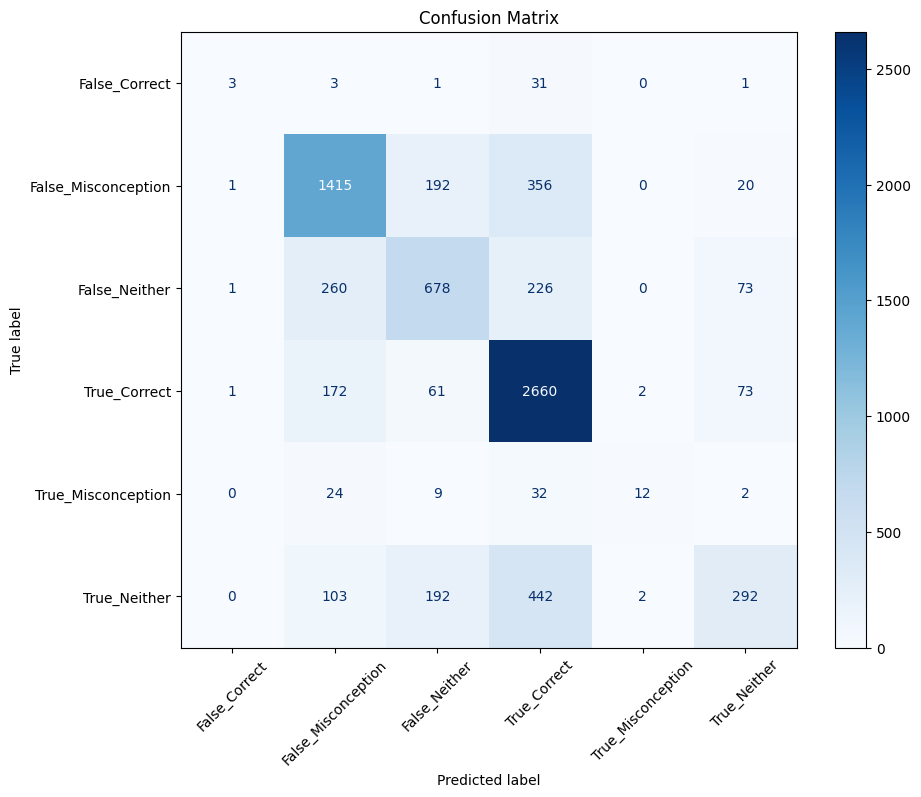

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ambiguity matrix calculation
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Drawing the ambiguity matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


Explanation:


confusion_matrix(...): Calculates the matrix based on actual values and predictions.



ConfusionMatrixDisplay(...): Creates a display object.



plot(...): To display the plot.



clf.classes_: To specify the order of labels used by the model (very important if there are multiple classes).



cmap="Blues": To choose a blue color for the gradient.



 Percentage within ambiguity matrix squares

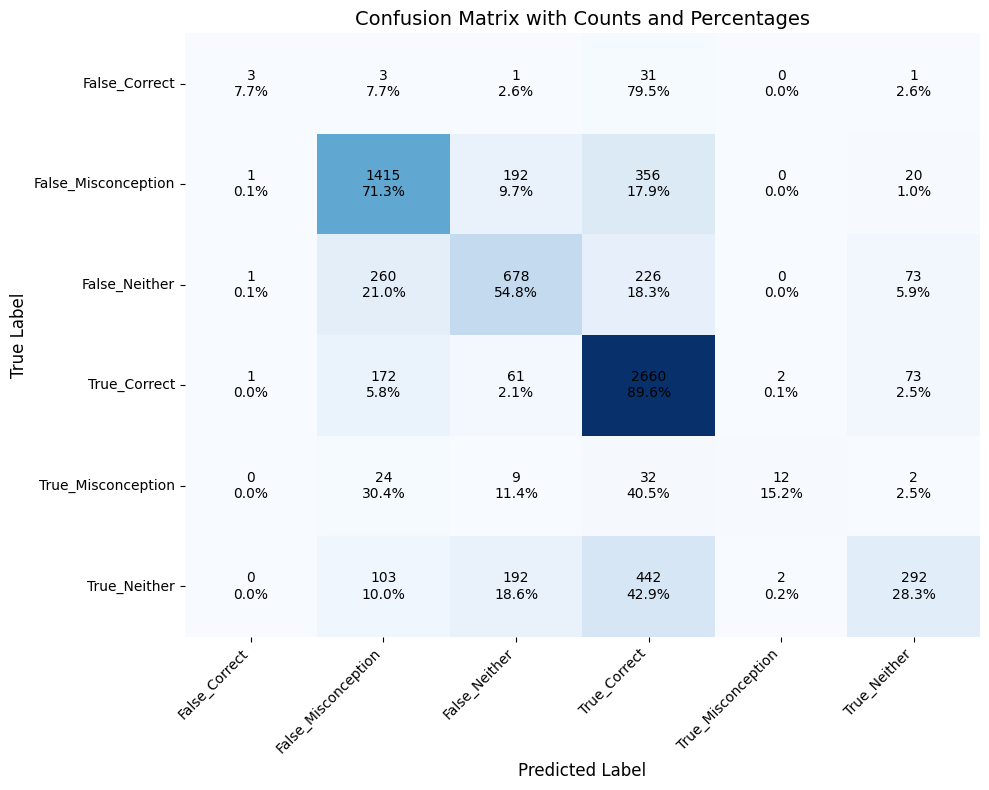

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Categories (Labels)
labels = ['False_Correct', 'False_Misconception', 'False_Neither',
          'True_Correct', 'True_Misconception', 'True_Neither']

# Ambiguity matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Convert values to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating the shape
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

# Add values and percentages within each cell
for i in range(len(labels)):
    for j in range(len(labels)):
        count = cm[i, j]
        percent = cm_percent[i, j] * 100
        text = f"{count}\n{percent:.1f}%"
        ax.text(j + 0.5, i + 0.5, text,
                ha="center", va="center", color="black", fontsize=10)

# Drawing coordination
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix with Counts and Percentages", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

# Preparing the tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Minimize letters
    text = text.lower()

    # Remove links and HTML tags
    text = re.sub(r"http\S+|www\S+|<.*?>", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Delete common words + Lemmatization
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]

    return " ".join(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df.columns)

Index(['row_id', 'QuestionId', 'QuestionText', 'MC_Answer',
       'StudentExplanation', 'Category', 'Misconception', 'Explanation_Length',
       'combined_text', 'Category_encoded'],
      dtype='object')


In [ ]:
df['StudentExplanation']

,StudentExplanation
0,0ne third is equal to tree nineth
1,1 / 3 because 6 over 9 is 2 thirds and 1 third...
2,"1 3rd is half of 3 6th, so it is simplee to un..."
3,1 goes into everything and 3 goes into nine
4,1 out of every 3 isn't coloured
...,...
36691,very unlikely.
36692,yea pretty much unlikely from what it seems.
36693,yeah pretty unlikelyy from what it seems.
36694,you have 9 other numbers to get.


In [ ]:
df['Misconception'].unique()

array([nan, 'Incomplete', 'WNB', 'SwapDividend', 'Mult', 'FlipChange',
       'Irrelevant', 'Wrong_Fraction', 'Additive', 'Not_variable',
       'Adding_terms', 'Inverse_operation', 'Inversion', 'Duplication',
       'Wrong_Operation', 'Whole_numbers_larger', 'Longer_is_bigger',
       'Ignores_zeroes', 'Shorter_is_bigger', 'Wrong_fraction',
       'Adding_across', 'Denominator-only_change',
       'Incorrect_equivalent_fraction_addition', 'Division',
       'Subtraction', 'Unknowable', 'Definition', 'Interior', 'Positive',
       'Tacking', 'Wrong_term', 'Firstterm', 'Base_rate',
       'Multiplying_by_4', 'Certainty', 'Scale'], dtype=object)

The goal of the model is:

To take the student's explanation text StudentExplanation and use it to predict the appropriate category of misconception Misconception.

🧠 Next in the action plan:

Since we are now in the process of text preprocessing, we will take the following steps:

1. Handling missing values:

Delete or fill in explanations containing NaN in StudentExplanation or Misconception.

2. Clean the text:

Convert the text to lowercase.

Remove special characters, numbers, punctuation marks, etc.

Remove common words (stopwords).

Choose between using stemming or lemmatization.

3. Convert text to vectors:

Use TF-IDF or CountVectorizer to convert textual explanations into a numerical representation that the model can understand.

4. Encode the target class (Misconception):

Use LabelEncoder or convert them to numbers manually.

Steps:

Data cleaning (removing NaN)

Text cleaning

Converting text to numbers (TF-IDF)

Coding categories (Misconception)

In [ ]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Delete empty values
df = df.dropna(subset=['StudentExplanation', 'Misconception'])

# 2. Cleaning up the text
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['StudentExplanation'].apply(clean_text)

# 3. Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

# 4. Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Misconception'])

# 5. Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Predict only on the test set!
y_pred = model.predict(X_test)

# 8. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report with correct label names
all_labels = list(range(len(label_encoder.classes_)))
print(classification_report(y_test, y_pred, labels=all_labels, target_names=label_encoder.classes_))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.6029411764705882
                                        precision    recall  f1-score   support

                         Adding_across       0.75      0.06      0.10        54
                          Adding_terms       0.00      0.00      0.00        22
                              Additive       0.47      0.81      0.59       193
                             Base_rate       0.00      0.00      0.00         5
                             Certainty       0.00      0.00      0.00         3
                            Definition       0.00      0.00      0.00         8
               Denominator-only_change       0.69      0.34      0.46        58
                              Division       0.00      0.00      0.00        11
                           Duplication       0.40      0.61      0.48       149
                             Firstterm       0.00      0.00      0.00        20
                            FlipChange       0.00      0.00      0.00        13
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
y_pred = model.predict(X_test)
print(len(y_test), len(y_pred))

1972 1972


In [ ]:
from sklearn.metrics import classification_report

# Bring all the classifications that the model has learned
all_labels = list(range(len(label_encoder.classes_)))

# Print the report using all the correct classifications and names.
print(classification_report(y_test, y_pred, labels=all_labels, target_names=label_encoder.classes_))

                                        precision    recall  f1-score   support

                         Adding_across       0.75      0.06      0.10        54
                          Adding_terms       0.00      0.00      0.00        22
                              Additive       0.47      0.81      0.59       193
                             Base_rate       0.00      0.00      0.00         5
                             Certainty       0.00      0.00      0.00         3
                            Definition       0.00      0.00      0.00         8
               Denominator-only_change       0.69      0.34      0.46        58
                              Division       0.00      0.00      0.00        11
                           Duplication       0.40      0.61      0.48       149
                             Firstterm       0.00      0.00      0.00        20
                            FlipChange       0.00      0.00      0.00        13
                        Ignores_zeroes 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
# Expected categories from the mode
unique_preds = np.unique(y_pred)
missing_labels = set(all_labels) - set(unique_preds)

if missing_labels:
    print("Unexpected categories: ", [label_encoder.classes_[i] for i in missing_labels])
else:
    print("All categories have been predicted.")

Unexpected categories:  ['Wrong_Operation', 'Adding_terms', 'Base_rate', 'Certainty', 'Definition', 'Division', 'Firstterm', 'FlipChange', 'Ignores_zeroes', 'Incorrect_equivalent_fraction_addition', 'Interior', 'Inverse_operation', 'Longer_is_bigger', 'Not_variable', 'Shorter_is_bigger', 'SwapDividend', 'WNB']


In [ ]:
# Display the number of samples for each category in the original data
label_counts = pd.Series(y).value_counts()
decoded_labels = label_encoder.inverse_transform(label_counts.index)
for label, count in zip(decoded_labels, label_counts):
    print(f"{label}: {count}")

Incomplete: 1454
Additive: 929
Duplication: 704
Subtraction: 620
Positive: 566
Wrong_term: 558
Irrelevant: 497
Wrong_fraction: 418
Inversion: 414
Mult: 353
Denominator-only_change: 336
Whole_numbers_larger: 329
Adding_across: 307
WNB: 299
Tacking: 290
Unknowable: 282
Wrong_Fraction: 273
SwapDividend: 206
Scale: 179
Not_variable: 154
Firstterm: 107
Adding_terms: 97
Multiplying_by_4: 96
FlipChange: 78
Division: 63
Definition: 54
Interior: 50
Longer_is_bigger: 24
Base_rate: 23
Ignores_zeroes: 23
Shorter_is_bigger: 23
Inverse_operation: 21
Certainty: 18
Incorrect_equivalent_fraction_addition: 9
Wrong_Operation: 6


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encrypt all categories at once
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Misconception'])

In [ ]:
df['Misconception'] = df['Misconception'].astype(str)
print(df['Misconception'].unique())

['Incomplete' 'WNB' 'SwapDividend' 'Mult' 'FlipChange' 'Irrelevant'
 'Wrong_Fraction' 'Additive' 'Not_variable' 'Adding_terms'
 'Inverse_operation' 'Inversion' 'Duplication' 'Wrong_Operation'
 'Whole_numbers_larger' 'Longer_is_bigger' 'Ignores_zeroes'
 'Shorter_is_bigger' 'Wrong_fraction' 'Adding_across'
 'Denominator-only_change' 'Incorrect_equivalent_fraction_addition'
 'Division' 'Subtraction' 'Unknowable' 'Definition' 'Interior' 'Positive'
 'Tacking' 'Wrong_term' 'Firstterm' 'Base_rate' 'Multiplying_by_4'
 'Certainty' 'Scale']


In [ ]:
df = df[df['Misconception'] != '0']

 Converting texts to TF-IDF vectors:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

 Encoding categories (Misconception) using LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Misconception'])

Split data into training and testing:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train the model using Logistic Regression or any other model:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Recode the column after deleting the value 0
df = df[df['Misconception'] != '0']
df['Misconception'] = df['Misconception'].astype(str)

# Retrain the label encoder after deletion
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Misconception_Encoded'] = label_encoder.fit_transform(df['Misconception'])


Manually assign categories in classification_report

In [ ]:
from sklearn.metrics import classification_report

# Get the actual categories present in y_test
labels = np.unique(y_test)

# Use only compatible category names
target_names = label_encoder.inverse_transform(labels)

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

                                        precision    recall  f1-score   support

                         Adding_across       0.44      0.35      0.39        54
                          Adding_terms       0.00      0.00      0.00        22
                              Additive       0.56      0.77      0.65       193
                             Base_rate       0.00      0.00      0.00         5
                             Certainty       1.00      0.33      0.50         3
                            Definition       1.00      1.00      1.00         8
               Denominator-only_change       0.67      0.64      0.65        58
                              Division       0.00      0.00      0.00        11
                           Duplication       0.42      0.74      0.53       149
                             Firstterm       0.22      0.10      0.14        20
                            FlipChange       0.50      0.08      0.13        13
                        Ignores_zeroes 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Report notes and analysis:

✅ Overall accuracy = 68%
This is considered a good result for a preliminary model, especially given the large number of categories (34).

⚠️ Problems found in the report:

Some categories have zero precision/recall:

For example: Adding_terms, Base_rate, Division, Ignores_zeroes, Inverse_operation, Shorter_is_bigger, Wrong_Operation, and others.

The reason is mostly that these categories:

Have little data in training.

The model did not learn them sufficiently, so it did not predict them at all.

UndefinedMetricWarning warning:

This is caused by categories that were never predicted.



🎯 Recommendations for improving the model:

1. Addressing data imbalance (Class Imbalance):

Some classes contain very few examples (e.g., Wrong_Operation = only 6 examples).

Possible solutions:

Exclude rare classes (e.g., less than 20 examples).

Or use algorithms that take imbalance into account, such as

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

3. Improve linguistic processing:

Try removing stopwords only after testing performance with and without them.

Use n-grams in TfidfVectorizer:

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

 Steps to improve the model with a focus on the goal:

Now I will suggest clear steps to improve the model, including a final graph (error map) that shows students' misunderstandings based on the results.

 Address the issue of data imbalance :

The distribution of classes is uneven, leading to poor performance for some classes. Use one of the following methods:

Rebalance using the imblearn library:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
print(type(X_train))
print(X_train[:5])

<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23 stored elements and shape (5, 2000)>
  Coords	Values
  (0, 1748)	1.0
  (1, 1342)	0.35069042392832295
  (1, 113)	0.4565117624003461
  (1, 881)	0.5310610436745924
  (1, 1950)	0.6217615340678093
  (2, 64)	0.23447580467529608
  (2, 1713)	0.18710869390674484
  (2, 1646)	0.2900063624019227
  (2, 107)	0.2712105093005351
  (2, 1432)	0.4395124103921537
  (2, 1411)	0.34799004263797195
  (2, 241)	0.3551227784285413
  (2, 1424)	0.41075782036497815
  (2, 555)	0.37848408115010673
  (3, 1748)	1.0
  (4, 583)	0.17491681056847644
  (4, 1778)	0.41202069252676476
  (4, 212)	0.4197311092742088
  (4, 733)	0.22969156972998894
  (4, 1906)	0.306541132464818
  (4, 18)	0.3140585774688383
  (4, 126)	0.43480477287983477
  (4, 1955)	0.43480477287983477


In [ ]:
pip install sentence-transformers scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 696.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 🧠 Sample fake data (replace with your real data later)
data = {
    'student_answer': [
        "5 is greater than 10",          # Misconception: Shorter is bigger
        "3 + 2 = 6",                     # Miscalculation
        "Area = 2 × π × r",              # Misread formula
        "The answer is 20",             # Missing explanation or terms
        "I don't understand the problem" # Unrelated or Off-topic
    ],
    'error_type': [
        'Shorter_is_bigger',
        'Miscalculation',
        'Misread_formula',
        'Missing_terms',
        'Unrelated'
    ]
}

# ⬇️ Convert data to DataFrame
df = pd.DataFrame(data)

# 🧪 Data partitioning
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['student_answer'], df['error_type'], test_size=0.2, random_state=42
)

# 🔠 Converting text to numerical representations using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_embed = model.encode(X_train_text.tolist(), show_progress_bar=True)
X_test_embed = model.encode(X_test_text.tolist(), show_progress_bar=True)

# 🌲 Random classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_embed, y_train)

# 🔍 Prediction
y_pred = classifier.predict(X_test_embed)

# 🧾 View results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

=== Classification Report ===
                precision    recall  f1-score   support

Miscalculation       0.00      0.00      0.00       1.0
 Missing_terms       0.00      0.00      0.00       0.0

      accuracy                           0.00       1.0
     macro avg       0.00      0.00      0.00       1.0
  weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
!pip install -q sentence-transformers scikit-learn

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ✅ Expanded dataset (50+ common student math mistakes)
texts = [
    "Forgot to square the value", "Used addition instead of subtraction",
    "Misplaced decimal point", "Divided instead of multiplied",
    "Incorrectly canceled terms", "Mixed up numerator and denominator",
    "Did not apply order of operations", "Missed a negative sign",
    "Rounded too early", "Added instead of multiplying",
    "Forgot to distribute multiplication", "Incorrect simplification",
    "Wrong use of exponent rules", "Confused percent and decimal",
    "Incorrectly converted units", "Forgot to convert minutes to hours",
    "Misread inequality sign", "Did not apply absolute value correctly",
    "Switched x and y axes", "Mistook a coefficient as an exponent",
    "Left out units", "Incorrectly identified slope and intercept",
    "Miscalculated average", "Confused mean and median",
    "Incorrect substitution in formula", "Wrong direction on number line",
    "Treated expressions as equations", "Multiplied across instead of adding",
    "Added exponents instead of multiplying", "Did not distribute a negative",
    "Treated variable as constant", "Forgot to take square root",
    "Assumed triangle was right-angled", "Wrong use of Pythagorean theorem",
    "Did not factor properly", "Confused area with perimeter",
    "Miscalculated base in geometry", "Misinterpreted scale",
    "Miscounted data values", "Rounded incorrectly",
    "Switched operation signs", "Forgot parentheses in expression",
    "Misused scientific notation", "Forgot rule of signs",
    "Misapplied distributive property", "Misread graph",
    "Omitted part of equation", "Switched digits when copying",
    "Incorrectly simplified fraction", "Mistook 0 for O",
    "Used calculator incorrectly", "Solved equation backwards"
]

labels = [
    "Missing_operation", "Wrong_operation",
    "Misread_number", "Wrong_operation",
    "Algebra_error", "Fraction_error",
    "PEMDAS_error", "Negative_sign_error",
    "Rounding_error", "Wrong_operation",
    "Distribution_error", "Simplification_error",
    "Exponent_rule_error", "Percentage_decimal_confusion",
    "Unit_conversion_error", "Unit_conversion_error",
    "Inequality_error", "Absolute_value_error",
    "Coordinate_error", "Coefficient_exponent_confusion",
    "Unit_omission", "Slope_intercept_confusion",
    "Statistical_error", "Statistical_error",
    "Substitution_error", "Number_line_error",
    "Equation_vs_expression", "Fraction_error",
    "Exponent_rule_error", "Negative_distribution_error",
    "Variable_constant_confusion", "Missing_operation",
    "Geometry_assumption_error", "Pythagorean_theorem_error",
    "Factoring_error", "Area_vs_perimeter",
    "Geometry_base_error", "Scale_interpretation_error",
    "Counting_error", "Rounding_error",
    "Sign_switch_error", "Parenthesis_error",
    "Scientific_notation_error", "Sign_rule_error",
    "Distributive_property_error", "Graph_reading_error",
    "Equation_omission", "Copying_error",
    "Fraction_simplification_error", "Symbol_confusion",
    "Calculator_usage_error", "Equation_solving_error"
]

# ✅ Ensure matching lengths
assert len(texts) == len(labels), f"Mismatch: {len(texts)} texts vs {len(labels)} labels"

# ✅ Split dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# ✅ Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# ✅ Encode texts
X_train_embed = model.encode(X_train_text, show_progress_bar=True)
X_test_embed = model.encode(X_test_text, show_progress_bar=True)

# ✅ Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embed, y_train)

# ✅ Evaluate
y_pred = clf.predict(X_test_embed)
print("=== SentenceTransformer Classification Report ===\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

=== SentenceTransformer Classification Report ===

                                precision    recall  f1-score   support

          Absolute_value_error       0.00      0.00      0.00         1
        Calculator_usage_error       0.00      0.00      0.00         1
Coefficient_exponent_confusion       0.00      0.00      0.00         1
                 Copying_error       0.00      0.00      0.00         1
           Exponent_rule_error       0.00      0.00      0.00         1
                Fraction_error       0.00      0.00      0.00         1
     Geometry_assumption_error       0.00      0.00      0.00         1
             Missing_operation       0.00      0.00      0.00         0
             Parenthesis_error       0.00      0.00      0.00         1
  Percentage_decimal_confusion       0.00      0.00      0.00         1
                Rounding_error       0.00      0.00      0.00         0
               Sign_rule_error       0.00      0.00      0.00         1
            

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# ✅ Install dependencies
!pip install -q sentence-transformers scikit-learn

# ✅ Imports
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ✅ Sample data (Make sure that the number of texts matches the number of categories.)
texts = [
    "The student forgot to square the value",
    "Used addition instead of subtraction",
    "Shorter is considered bigger",
    "Misinterpreted decimal point",
    "Missing variable in equation"
]

labels = [
    "Missing_operation",
    "Wrong_operation",
    "Shorter_is_bigger",
    "Misread_number",
    "Missing_terms"
]

# ✅ Data partitioning
X_train_text, X_test_text, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# ✅ Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# ✅ Embed text
X_train_embed = model.encode(X_train_text, show_progress_bar=True)
X_test_embed = model.encode(X_test_text, show_progress_bar=True)

# ✅ Train classifier
classifier = LogisticRegression()
classifier.fit(X_train_embed, y_train)

# ✅ Evaluate model
y_pred = classifier.predict(X_test_embed)
print("=== Classification using SentenceTransformer ===")
print(classification_report(y_test, y_pred))

# ✅ Simple user interface
while True:
    print("\nEnter a math mistake description (or type 'exit' to quit):")
    user_input = input("> ")
    if user_input.lower() == "exit":
        break

    user_embed = model.encode([user_input])
    prediction = classifier.predict(user_embed)
    print(f"\nPredicted error category: {prediction[0]}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

=== Classification using SentenceTransformer ===
                 precision    recall  f1-score   support

  Missing_terms       0.00      0.00      0.00       0.0
Wrong_operation       0.00      0.00      0.00       1.0

       accuracy                           0.00       1.0
      macro avg       0.00      0.00      0.00       1.0
   weighted avg       0.00      0.00      0.00       1.0


Enter a math mistake description (or type 'exit' to quit):
> Forgot to add a carry in addition

Predicted error category: Missing_terms

Enter a math mistake description (or type 'exit' to quit):
> Used wrong sign in equation

Predicted error category: Missing_terms

Enter a math mistake description (or type 'exit' to quit):
> exit
